In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_set =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None) 
test_set= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows=1 ,header = None) 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'] 
train_set.columns = col_labels 
test_set.columns = col_labels

In [3]:
# Adding Training and test data into one data frame df
df=pd.concat([train_set,test_set],axis=0)
df.head()
original_df=df # Keeping copy of original data frame

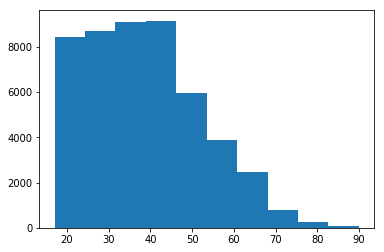

In [4]:
# Plotting Histigram of Age feature
plt.hist(df['age']);

In [6]:
# Making target column as categorical value as for >50K salaris as 1 and <=50K as 0
df['Income'] = df['income'].apply(lambda x: 1 if x==' >50K' else 0)
df.drop('income',axis=1,inplace=True)

In [6]:
# Displaying first 5 records 
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
# Displaying the statistical values of the data
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.160538
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.367108
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [7]:
# Replacing ? with Nan values
df.replace(' ?', np.nan, inplace=True)

In [8]:
# Getting the count of Nan/Null values
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [9]:
# Filling na values with 0
df.fillna(' 0', inplace=True)

In [10]:
col_in_category = (
    'workclass',
    'education',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native_country'
)

from sklearn.preprocessing import LabelEncoder

for col in col_in_category:
    encoder=LabelEncoder()
    df[col]=encoder.fit_transform(df[col])

In [11]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [12]:
from sklearn.model_selection import train_test_split

In [15]:
# Creating target and Independent variable for algorithm
Y=np.array(df['income'])
X=np.array(df.drop(['income'],1))

In [16]:
# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
# Importing XG Boost classifier
import xgboost as xgb
model = xgb.XGBClassifier()

In [18]:
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=10)

In [19]:
# learning the training data and fitting them 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [20]:
top_param=grid_search.best_estimator_

In [21]:
best_model=XGBClassifier(learning_rate=top_param.learning_rate,booster=top_param.booster,gamma=top_param.gamma,n_estimators=top_param.n_estimators)

In [22]:
best_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.3,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [23]:
best_model.score(X_train, y_train)

0.586491950963581

In [24]:
# fitting againist test data
best_model.score(X_test,y_test)

0.5761080970416624